In [34]:
from pathlib import Path
import h5py
import numpy as np

import matplotlib.pyplot as plt
from typing import Dict, List, Tuple

In [ ]:
SIM_PATH = Path("../data/results/testing_fixtures_maize/maize_baseline.h5")
print(SIM_PATH.resolve())  # Te muestra la ruta absoluta
print(SIM_PATH.exists())  # True si existe, False si no

In [37]:
def recorrer_grupo(grupo, nivel=0):
    for key, item in grupo.items():
        print("  " * nivel + f"- {key}: {type(item)}")
        if isinstance(item, h5py.Group):
            recorrer_grupo(item, nivel + 1)


with h5py.File(SIM_PATH.resolve(), "r") as f:
    recorrer_grupo(f)

print()
with h5py.File(SIM_PATH.resolve(), "r") as f:
    arrays: Dict[str, np.ndarray] = {}
    for key, dset in f["results"].items():
        print(f"{key:15} shape={dset.shape}, dtype={dset.dtype}")
        if isinstance(dset, h5py.Dataset):
            arrays[key] = np.array(dset[:])  # pasar a numpy

- results: <class 'h5py._hl.group.Group'>
  - au_layers: <class 'h5py._hl.dataset.Dataset'>
  - biomass_cum: <class 'h5py._hl.dataset.Dataset'>
  - biomass_daily: <class 'h5py._hl.dataset.Dataset'>
  - ceh: <class 'h5py._hl.dataset.Dataset'>
  - ceh_pc: <class 'h5py._hl.dataset.Dataset'>
  - ceh_r: <class 'h5py._hl.dataset.Dataset'>
  - cover: <class 'h5py._hl.dataset.Dataset'>
  - dates: <class 'h5py._hl.dataset.Dataset'>
  - eff_precip: <class 'h5py._hl.dataset.Dataset'>
  - et0: <class 'h5py._hl.dataset.Dataset'>
  - eur_act: <class 'h5py._hl.dataset.Dataset'>
  - p_au: <class 'h5py._hl.dataset.Dataset'>
  - par: <class 'h5py._hl.dataset.Dataset'>
  - precip: <class 'h5py._hl.dataset.Dataset'>
  - root_depth: <class 'h5py._hl.dataset.Dataset'>
  - soil_evap: <class 'h5py._hl.dataset.Dataset'>
  - t_eur: <class 'h5py._hl.dataset.Dataset'>
  - temp: <class 'h5py._hl.dataset.Dataset'>
  - transpiration: <class 'h5py._hl.dataset.Dataset'>
  - yield_tensor: <class 'h5py._hl.dataset.Datas

In [ ]:
print(arrays.keys())

In [ ]:
keys = [
    "biomass_cum",
    "biomass_daily",
    "ceh",
    "ceh_pc",
    "ceh_r",
    "cover",
    "dates",
    "eff_precip",
    "et0",
    "eur_act",
    "p_au",
    "par",
    "precip",
    "root_depth",
    "soil_evap",
    "t_eur",
    "temp",
    "transpiration",
    "yield_tensor",
]

key = [
    "biomass_cum",
    "biomass_daily",
    "ceh",
    "ceh_pc",
    "ceh_r",
    "cover",
    "eff_precip",
    "eur_act",
    "p_au",
    "root_depth",
    "soil_evap",
    "transpiration",
    "yield_tensor",
]

In [33]:
for key in keys:
    print(key, arrays[key].shape)
    data_array = arrays[key][
        0:3, 0:3, -2:
    ]  #  New:(H, W, T) -> Legacy:(T, W, H)
    print(data_array)
    break

biomass_cum (278, 358, 181)
[[[   0.            0.        ]
  [   0.            0.        ]
  [   0.            0.        ]]

 [[2734.02889239 2734.04717232]
  [   0.            0.        ]
  [   0.            0.        ]]

 [[3256.11384156 3256.13212149]
  [3256.11384156 3256.13212149]
  [   0.            0.        ]]]


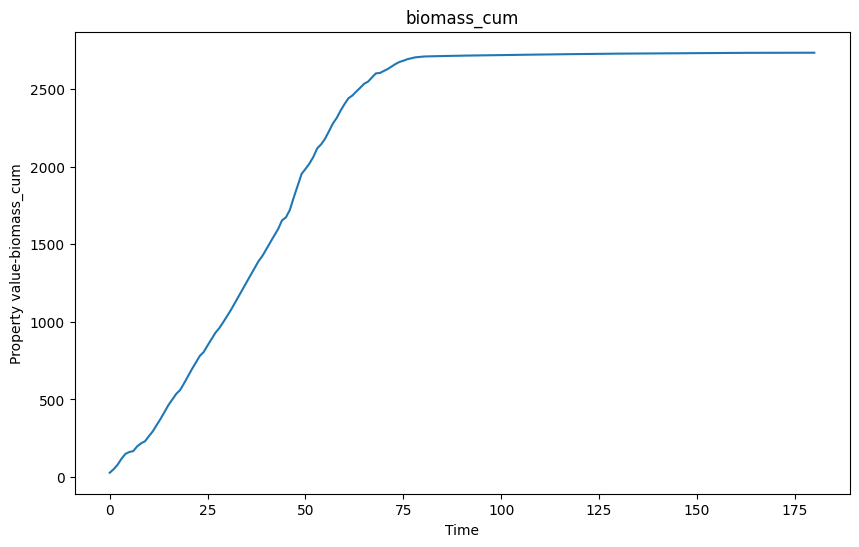

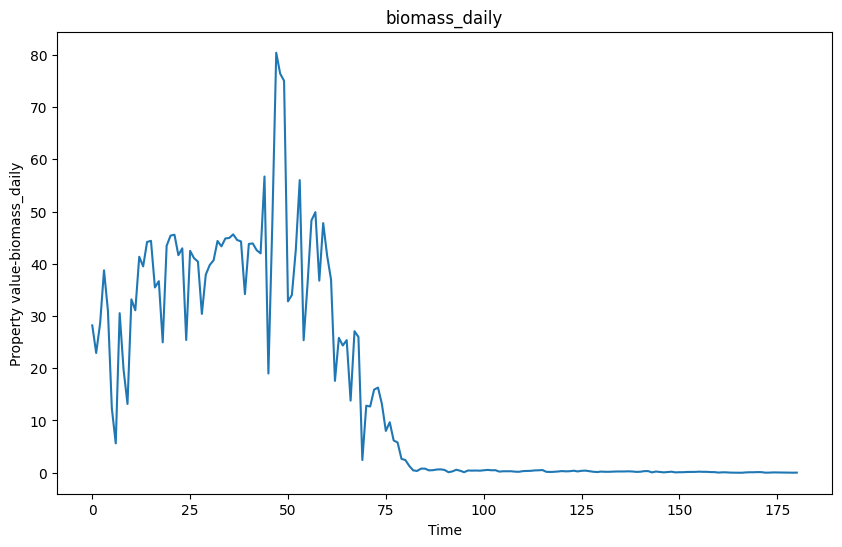

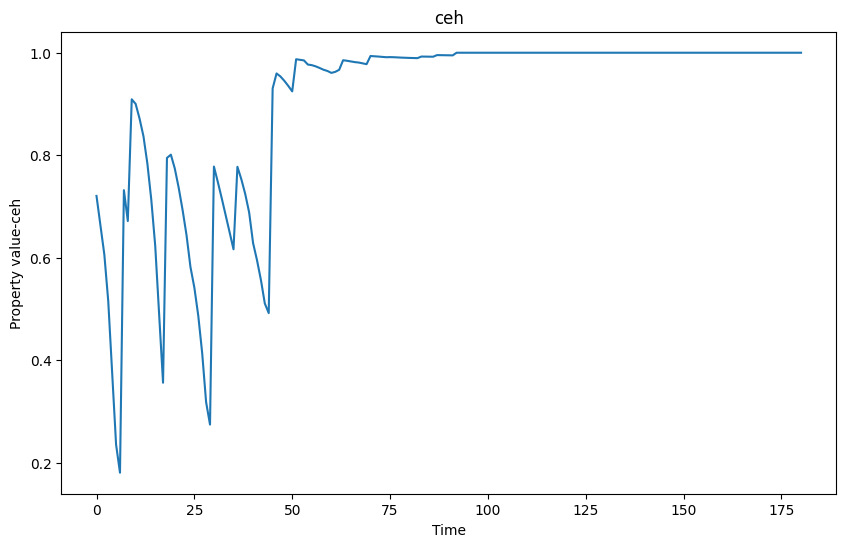

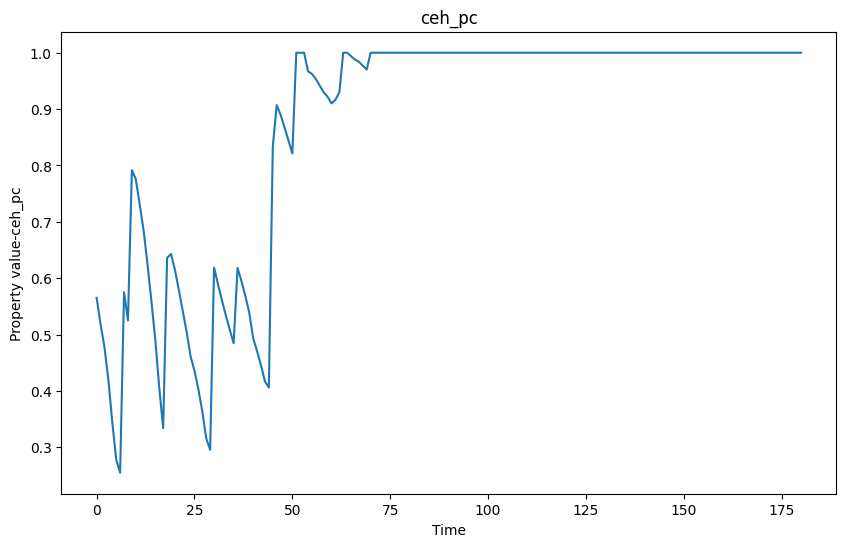

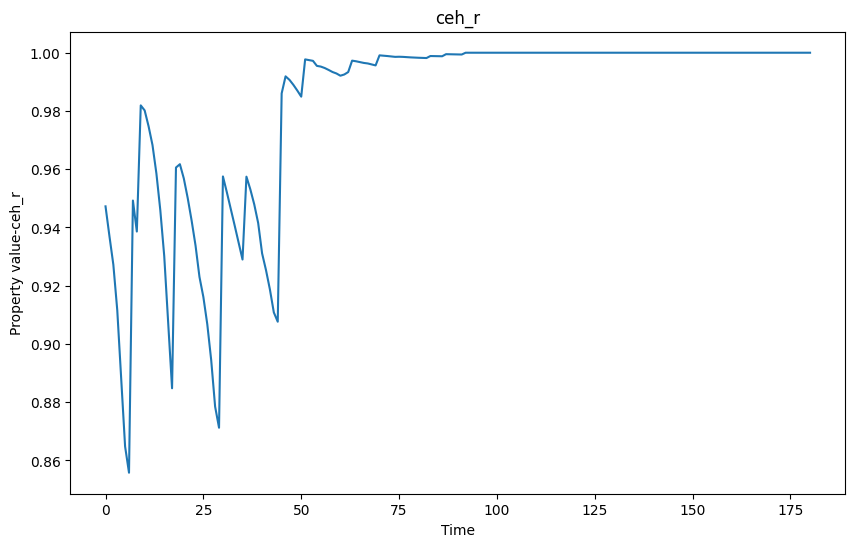

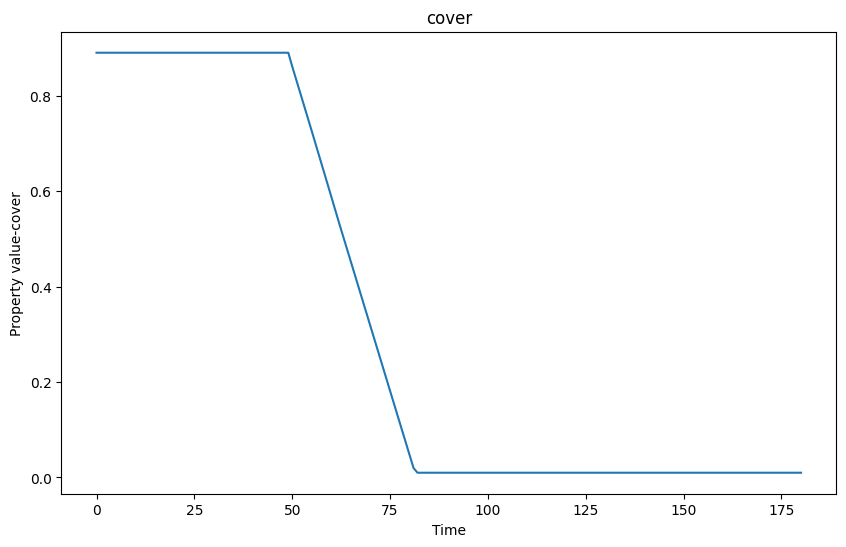

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [36]:
# data.shape = (278, 358, 181)
for key in keys:
    t = np.arange(181)
    data_pixel = arrays[key][1, 0, :]

    plt.figure(figsize=(10, 6))
    plt.plot(
        t,
        data_pixel,
    )  # todas las curvas con baja opacidad
    plt.xlabel("Time")
    plt.ylabel(f"Property value-{key}")
    plt.title(f"{key}")
    plt.show()